### Objective:

Abalone is a common name for any of a group of small to very large sea snails.

The meat (foot muscle) of abalone is used for food, and the shells of abalone are used as decorative items

The Abalone Dataset involves predicting the age of abalone given objective measures of individuals.

It can be worked out as a regression problem.

lets start....

In [ ]:
# Here is an image of abalone

from IPython.display import Image
Image(filename='C:\\Users\\user\\Desktop\\abalone.jpg')

In [1]:
# Importing the Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the Data

abdata = pd.read_csv("C:\\Users\\user\\Desktop\\abalone.data",header = None)

In [3]:
# first five rows of Data

abdata.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Lets change the column names with their respective variable names

abdata.columns = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']

In [5]:
# Now Lets Check first five rows

abdata.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Variables Information:

Given is the brief description of variables what we have. 

The number of rings is the value to predict: which is numeric 

### Name - Data Type - Measurement Unit / Description 
----------------------------- 
1. Sex            -- M, F, and I (infant) 
2. Length         -- mm Longest shell measurement 
3. Diameter       -- mm perpendicular to length 
4. Height         -- mm with meat in shell 
5. Whole weight   -- grams whole abalone 
6. Shucked weight -- grams weight of meat 
7. Viscera weight -- grams gut weight (after bleeding) 
8. Shell weight   -- grams after being dried 
9. Rings          -- +1.5 gives the age in years

#### Here Our Target Variable is Rings

Depending on other column parameters we need to predict the Rings

### Lets start with EDA to get some insights on Data

In [6]:
# checking number of rows and columns

abdata.shape

(4177, 9)

In [7]:
# checking data types of variables

abdata.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Rings               int64
dtype: object

Except Sex variable all are Numerical.

Sex variable is Categorical variable.

In [8]:
# Statistics for numerical variables

abdata.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Looking at the summary of the data we can see certain measures of each variable like Mean, Standard Deviation, Minimum, Quantiles(Q1,Q3), Median, & Maximum values....

These can be Used in further analyzation.

Except These There is not much insights to look into, so we will dig deep into some other stats methods

In [ ]:
# checking stats with pandas-profiling

import pandas_profiling as pp
pp.ProfileReport(abdata)

with the pandas profiling we got some good analytics...

suggesting some variables are having colinearity and need to be analyzed.

(Note : co-linearity is the relation between two input variables....it should affect the model performance)

And also giving some deep insights for each variable.

In [9]:
# Check for the missing values

abdata.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

There are no missing values in the data

In [10]:
# Checking the unique values in Rings variable

abdata['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

## Lets do some Visual analysis

#### Univariate Analysis

Here we will see each variable distribution visually with help of some graphs like

1. Histograms - Shows the variable distribution along the mean/median
2. Boxplot    - shows the outliers

Histograms Are already came in pandas-profiling

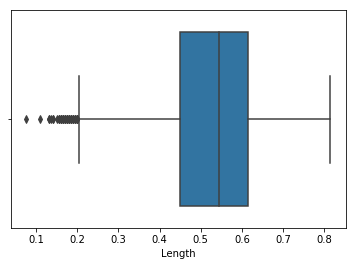

In [11]:
# Boxplots

sns.boxplot(abdata['Length'])

like this checking for other variables there are some outliers present in each column of input variables which are not good for modelling.
so to resolve this we need to treat the outliers before giving it to the model.

Note: Outliers are values that are having high data points or low data points , those can affect other data points in the analysis.

#### Bivariate Analysis

where we will see the relation between two or more variables visually

Plots Used 

1. Scatter Plot
2. Correlation Heatmap

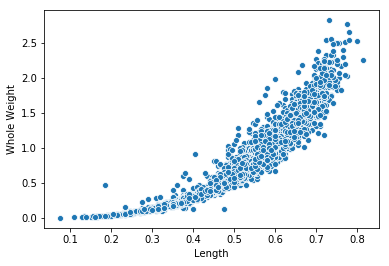

In [12]:
# Scatter

sns.scatterplot(x = 'Length',y = 'Whole Weight',data = abdata)

In [13]:
# correlation between variables

corr = abdata.corr()

Lets make the results visual

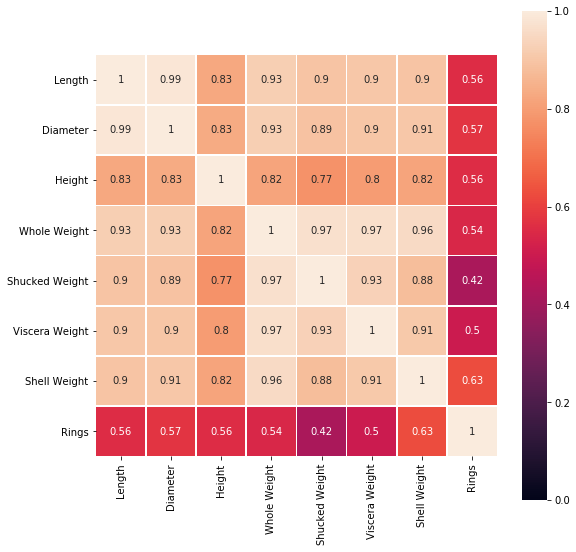

In [14]:
fig,ax = plt.subplots(figsize = (9,9))
sns.heatmap(corr, vmin=0, vmax=1, square=True, annot=True, linewidths=.5)

correlation factor should affect the selection of input variables

correlation should be 

high for input and output
low for input and input

by seeing the above results there are some input variables that are highly correlated with other inputs , which is observed in panda-profilng

so we can exclude that variables to increase our model performance

and also there is not such good correlation b/w input and output, so that one also we need to look out for.

#### Upto Now our basic analysis is done ...

## Now Lets do Some Data preprocessing Steps/Data preparation

In our data we have sex column which is having three classes male, female, infant....

Lets convert them to numeric

In [15]:
# Change of Categorical Variables to Numerical 

# using get_dummies function will change the cat variables to 0 and 1

abdata = pd.get_dummies(abdata)

In [16]:
abdata.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [17]:
# Re-Ordering the columns

abdata = abdata[['Sex_I','Sex_F','Sex_M','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']]

## Splitting the Input & Output

In [18]:
# Seperate input(X) and output(y) for modelling

y = abdata['Rings'].astype(float)
y.head()

0    15.0
1     7.0
2     9.0
3    10.0
4     7.0
Name: Rings, dtype: float64

We will take all input varaibles for now to avoid bias for modelling 

(Note: variables 'Length','Whole Weight','Viscera Weight','Shell Weight' are rejected in pandas-profiling for co linearity)

['Sex_F','Sex_M','Diameter','Height','Shucked Weight','Length','Whole Weight','Viscera Weight','Shell Weight']

In [19]:
# Here we need to avoid dummy variable trap as droping one dummy variable

X = abdata[['Sex_F','Sex_M','Diameter','Height','Shucked Weight','Length','Whole Weight','Viscera Weight','Shell Weight']]

In [20]:
X.head()

,Sex_F,Sex_M,Diameter,Height,Shucked Weight,Length,Whole Weight,Viscera Weight,Shell Weight
0,0,1,0.365,0.095,0.2245,0.455,0.5140,0.1010,0.150
1,0,1,0.265,0.090,0.0995,0.350,0.2255,0.0485,0.070
2,1,0,0.420,0.135,0.2565,0.530,0.6770,0.1415,0.210
3,0,1,0.365,0.125,0.2155,0.440,0.5160,0.1140,0.155
4,0,0,0.255,0.080,0.0895,0.330,0.2050,0.0395,0.055


We can do feature scaling to get all variables into one scale...

for now lets move on with out feature scaling.....

### Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X,columns = ['Sex_F','Sex_M','Diameter','Height','Shucked Weight','Length','Whole Weight','Viscera Weight','Shell Weight'])

## Train & Test Split

In [21]:
# Dividing The Data As Train & Test to train our model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [22]:
y_train.head() # To Check split

2746     8.0
853      9.0
1809     8.0
3419     8.0
1199    10.0
Name: Rings, dtype: float64

so far we studied our data and we prepared our data for modelling.

Now We need to apply the Machine Learning Models

# Modelling

### Regression

### Linear 

In [25]:
# Importing the model from scikit-learn

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [35]:
# Accuracy Check

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5425228614935411

### Trying some other Models

In [36]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
r2_score(rfr_pred,y_test)

0.3116567914970414

In [38]:
# DecisionTree

from sklearn.tree import DecisionTreeClassifier
dcr = DecisionTreeClassifier(random_state=0)
dcr.fit(X_train,y_train)
dcr_pred = dcr.predict(X_test)
r2_score(dcr_pred,y_test)

0.2270509900770885

we got an accuracy score of 54% for linear regression which is a good accuracy looking from other resources in online...

We can try to imporve this accuracy by

Suggestions:

Treating the outliers for each column separately, 
Improving Rings column to gaussian distribution,
we taken all inputs intsead of taking suggesting inputs ...so we need to look for that one.